In [2]:
#Retrieving a large set of imdb ratings from keras server.
from keras.datasets import imdb
top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = top_words)

17465344/17464789 [==============================] - 3s 0us/step


In [3]:
#Showing the first train rating already in the numeric format. Since we can't work with words, the words were classified in order of 
#how often they appear. Lets imagine the word "movie" were the most common word in a text. In that case, it should have the index 1.
#The third most common word would have the index 3, and that is what those numbers are on the following list, but with one detail:
#The numbers 0,1 and 2 are already reserved to the start of the rating (1), an unknown word (2) and 0 is for padding. With that on mind,
#it's easy to see that the most common word should be the number 3 on the list, the second most common should be the number 4, and so the others.
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
#Here we get the word index in that style: {'word': index}, the index represents how often the word appear. A lower number mean higher frequency on text.
imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [5]:
#Here we'll reverse things and see what's written on the second step text (the one with only numbers).
#First we get the word index again, our dictionary.
word_dict = imdb.get_word_index()
#Then, we save it but adjusting the "frequency" to be +3 to adjust and respect the 0,1 and 2 values being reserved.
word_dict = { key:(value+3) for key, value in word_dict.items() }
#We define the values for the reserved indexes.
word_dict[''] = 0 #Padding
word_dict['>'] = 1 #Start
word_dict['?'] = 2 #Unknown Word
#Here we get the reverse word dictionary: If we had something like '["movie"] : 4', now we have '[4]: "movie"'. 
reverse_word_dict = { value:key for key, value in word_dict.items() }
#Here we do the following: (1) get the values from the first list we've used, the numbers list (it's a tensor, but lets think as a list).
#then we iterate trought it getting the values and finding the word that correspond to them on our reverse_word_dict.
#Next, we put a blank space ' ' before the word. Of course, we print all of it.
print(' '.join(reverse_word_dict[id] for id in x_train[0]))

> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [9]:
#Since we need all our tensors (lists) with the same size, we'll ask keras to limit their size to 500 integers.
from keras.preprocessing import sequence

max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen = max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen = max_review_length)

In [10]:
#Now that our dataset is clean and prepared, we're ready to start creating our model!
#Here we import the stuff we'll need
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Dense
from keras.layers import Flatten

#Well... lets not talk about it now, ok?
embedding_vector_length = 32
#Here we start creating our model layers
model = Sequential()
#Here we add our embedding layer to deal with words
model.add(Embedding(top_words, embedding_vector_length, input_length = max_review_length))
#Here we we redirect the embedding result to the next layer
model.add(Flatten())
#Thats our neurons, we used 16 neurons, but you can try other values.
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
#Here we use only one neuron because we want only one exit, our answer, from 0.0 (didnt liked) to 1.0 (liked)
model.add(Dense(1, activation='sigmoid'))
#Here compile our model.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#ok, how's our model shape right now?
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
#But we haven't trained our neural wb yet. We can do it with this command:
#obs.: it can take a while.
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 8s 317us/step - loss: 0.5287 - acc: 0.6959 - val_loss: 0.3091 - val_acc: 0.8679
Epoch 2/5
25000/25000 [==============================] - 7s 292us/step - loss: 0.1945 - acc: 0.9282 - val_loss: 0.2959 - val_acc: 0.8767
Epoch 3/5
25000/25000 [==============================] - 7s 284us/step - loss: 0.0664 - acc: 0.9829 - val_loss: 0.3478 - val_acc: 0.8719
Epoch 4/5
25000/25000 [==============================] - 7s 289us/step - loss: 0.0178 - acc: 0.9974 - val_loss: 0.4057 - val_acc: 0.8686
Epoch 5/5
25000/25000 [==============================] - 7s 294us/step - loss: 0.0051 - acc: 0.9993 - val_loss: 0.4604 - val_acc: 0.8662


[]

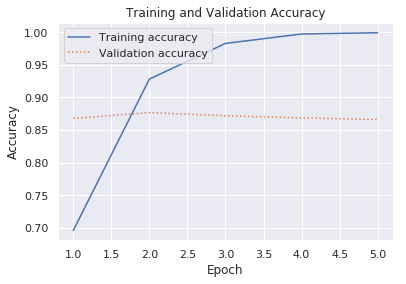

In [12]:
#Lets understand what happened. 
#The Epoch is a "training session". It trains and tests the model at each Epoch. 
#The "acc" is how accurate your model is to predict using the training data.
#The "val_acc" is how accurate your model is to predict using new data, other than the training data.
#You can see that the training accuracy went up right on the second Epoch and at the end of the last Epoch it was almost 100%, but our 
#validation accuracy fell a little, and that is NOT good, we need to be able to predict new data.
#batch_size tells keras to use 128 examples of training at the same time to train the neural web.

#We can check how our training went with the following code:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['acc']
val = hist.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

[]

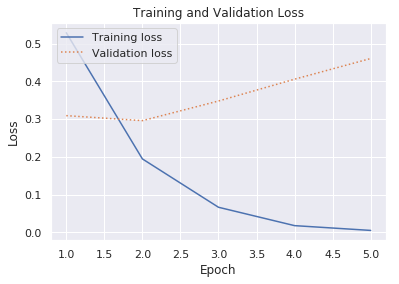

In [13]:
#Again, we can see that our training accuracy went up, but our validation accuracy fell a little after the second Epoch.
#We dont want that!
#We can also take a look at the losses.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
loss = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val, ':', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.plot()


In [14]:
#We can see that our validation loss was going higher in a linear way and that is NOT good. We want our model to predict things well. 
#By those data we should see that two Epochs would be better than five.
#Lets evaluate the current model:

scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 86.62%


In [15]:
#You can see that your model accuracy is the same value you found on your last Epoch val_acc.
#Lets play with our model a little. That's a code so we can insert a text and use our model to evaluate the text we've entered.

import string
import numpy as np

def analyze(text):
    # Prepare the input by removing punctuation characters, converting
    # characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

In [16]:
#Lets use our function to pass a text to our model and check how it goes.
analyze('Easily the most stellar experience I have ever had.')

0.9819048

In [17]:
#Looks pretty accurate. Remember: numbers near 1.0 represents a positive commentary.
#But lets test with another one, a bad one this time:
analyze('The long lines and poor customer service really turned me off.')

0.03137804

In [20]:
#Well well, looks like it works really well for the time and the work we had here. 
#Pardon me, but i'll give a shot to:
analyze('The overall experience was good but the main character could do better')

0.5900646

In [ ]:
#Really nice! And that's the end of our lesson!
#Hope you found those comments useful, sorry for any english errors (im from Brazil) and i hope wee see each other again!